Precision Journalism 
============

Data science examples from [Precision Journalism](https://rowman.com/ISBN/9780742510883/Precision-Journalism-A-Reporter) by Philip Meyer.

## Detroit Data ##

Here we will use a DataFrame to examine the data from the text.

In [6]:
# this is a python library for data frames
# which you can think of as spreadsheet-like objects
import pandas as pd 
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [6]:
pd_education = pd.DataFrame({'dropouts':{'rioters':18,'non-rioters':82},
                             'high school':{'rioters':15,'non-rioters':85},
                             'college':{'rioters':18,'non-rioters':82}})

In [7]:
pd_education

,college,dropouts,high school
non-rioters,82,82,85
rioters,18,18,15


In [8]:
pd_origin = pd.DataFrame({'south':{'rioters':8,'non-rioters':92},
                         'north':{'rioters':25,'non-rioters':75}})

In [9]:
pd_origin

,north,south
non-rioters,75,92
rioters,25,8


# Sampling and sample sizes #

We worked on this in class.

In [12]:
N = 10000
N_samp = 100
results_5 = np.zeros(N)
results_1 = np.zeros(N)
for i in xrange(N):
    results_5[i] = sum(np.random.rand(N_samp) > .5) #world is 50% vegetarian
    results_1[i] = sum(np.random.rand(N_samp) > .1) #world is 90% vegetarian

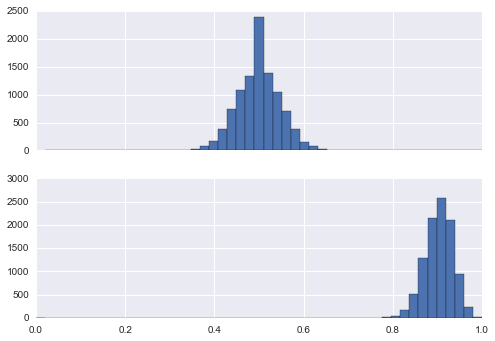

In [14]:
figs,ax = plt.subplots(2,sharex=True)
ax[0].hist(results_5/float(N_samp),bins=np.linspace(0,1,50))
ax[1].hist(results_1/float(N_samp),bins=np.linspace(0,1,50));

In [22]:
print 'observed standard error',sqrt(.5 * (1-.5) / N_samp)
print 'computed stadnard error', np.std(results_5/float(N_samp))

observed standard error 0.05
computed stadnard error 0.049900787609


In [23]:
print 'computed standard error',sqrt(.1 * (1-.1) / N_samp)
print 'observed standard error',np.std(results_1/float(N_samp))

computed standard error 0.03
observed standard error 0.0300851806709


95% confidence interval:

In [41]:
x = results_1/float(N_samp)
mu = .9
stderr = sqrt(mu * (1-mu) / N_samp)
CI = ((x > mu - 2 * stderr) & (x < mu + 2 * stderr)).mean()
print CI

0.9356


## Game theory (Chapter 2) ##

In [10]:
payoffs = np.array([[40.,100.],[100.,60.]])

In [11]:
expected_payoff = lambda a : payoffs[0,0] * a * a \
+ payoffs[0,1] * a * (1-a)\
+ payoffs[1,0] * (1-a) * a\
+ payoffs[1,1] * (1-a)*(1-a)

In [24]:
print expected_payoff(1)
print expected_payoff(0.5)
print expected_payoff(0.4)
print expected_payoff(0.)

40.0
75.0
76.0
60.0


In [19]:
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


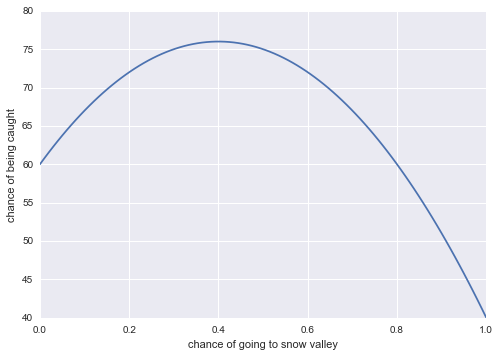

In [29]:
strategies = np.linspace(0,1,100)
plt.plot(strategies,expected_payoff(strategies));
plt.xlabel('chance of going to snow valley')
plt.ylabel('chance of being caught');

## Curve Fitting (Chapter 3 ##

Let's look at some election polling and fit some curves.

Data is from [HuffPo](http://elections.huffingtonpost.com/pollster/2016-iowa-presidential-republican-caucus#!estimate=custom)

In [128]:
# pandas completely handles reading CSV files for you
df_iowa = pd.read_csv('../data-and-demos/2016-iowa-presidential-republican-caucus.csv')

In [129]:
# head gives a quick summary of the dataframe
df_iowa.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Cruz,Rubio,...,Gilmore,Graham,Jindal,Pataki,Perry,Walker,Pollster URL,Source URL,Partisan,Affiliation
0,Gravis Marketing/One America News,2016-01-11,2016-01-12,2016-01-13 21:03:39 UTC 2016-01-13 21:03:39 UTC,422,Likely Voters - Republican,Automated Phone,34,28,5,...,NaN,NaN,NaN,NaN,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Sponsor,Rep
1,PPP (D),2016-01-08,2016-01-10,2016-01-12 17:14:24 UTC 2016-01-12 17:14:24 UTC,530,Likely Voters - Republican,IVR/Online,28,26,13,...,0,NaN,NaN,NaN,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Pollster,Dem
2,Des Moines Register/Bloomberg/Selzer,2016-01-07,2016-01-10,2016-01-13 11:53:11 UTC 2016-01-13 11:53:11 UTC,500,Likely Voters - Republican,Live Phone,22,25,12,...,0,NaN,NaN,NaN,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
3,ARG,2016-01-06,2016-01-10,2016-01-11 18:58:06 UTC 2016-01-11 18:58:06 UTC,600,Likely Voters - Republican,Live Phone,29,25,10,...,NaN,NaN,NaN,NaN,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
4,Quinnipiac,2016-01-05,2016-01-10,2016-01-11 17:39:23 UTC 2016-01-11 17:39:23 UTC,602,Likely Voters - Republican,Live Phone,31,29,15,...,NaN,NaN,NaN,NaN,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None


Let's plot some poll results.

In [130]:
dates = pd.to_datetime(df_iowa['End Date'])

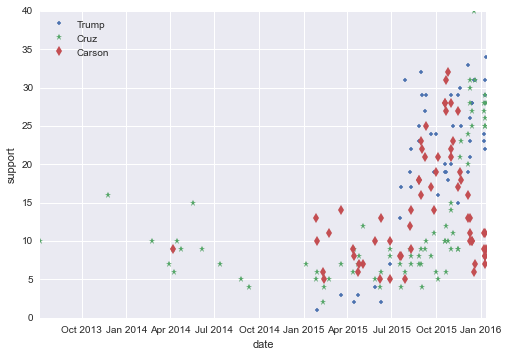

In [131]:
plt.plot(dates,df_iowa.Trump,'.')
plt.plot(dates,df_iowa.Cruz,'*')
plt.plot(dates,df_iowa.Carson,'d')

plt.legend(['Trump','Cruz','Carson'],loc='upper left')
plt.ylabel('support')
plt.xlabel('date');

Let's connect the points with lines

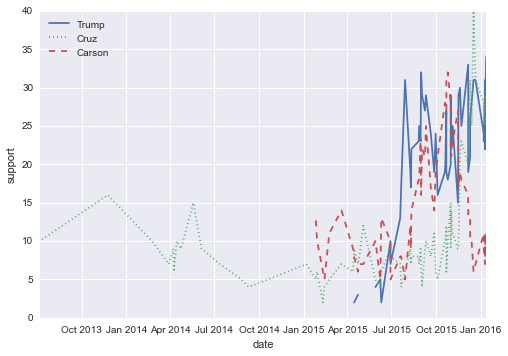

In [132]:
plt.plot(dates,df_iowa.Trump,'-')
plt.plot(dates,df_iowa.Cruz,':')
plt.plot(dates,df_iowa.Carson,'--')

plt.legend(['Trump','Cruz','Carson'],loc='upper left')
plt.ylabel('support')
plt.xlabel('date');

This is arguably too jaggedy: "The theory behind smoothing is that measurement error is a secular trend, and can be taken out by using each point as a check on the neighboring points" (Meyer pg 46). 

Let's try smoothing these points, using Panda's [exponentially-weighted moving average](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.ewma.html)

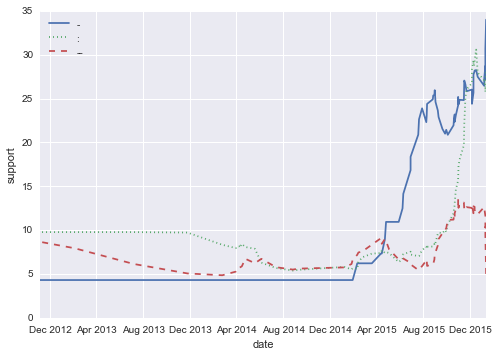

In [134]:
keys = ['Trump','Cruz','Rubio']
shapes = ['-',':','--']
for key,shape in zip(keys,shapes):
    plt.plot(dates,np.array(pd.ewma(df_iowa[key],span=10)),shape)
plt.legend(shapes,loc='best');
plt.xlabel('date')
plt.ylabel('support');

Let's abstract this into a function.

In [139]:
def makePlot(keys,ewma_span,data):
    dates = pd.to_datetime(data['End Date'])
    shapes = ['-',':','--']
    for i,key in enumerate(keys):
        shape = shapes[i % 3]
        plt.plot(dates,np.array(pd.ewma(data[key],span=ewma_span)),shape)
    plt.legend(keys,loc='upper left');
    plt.xlabel('date')
    plt.ylabel('support')

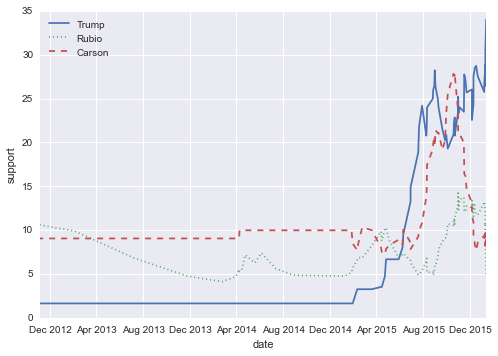

In [140]:
makePlot(['Trump','Rubio','Carson'],5,df_iowa)

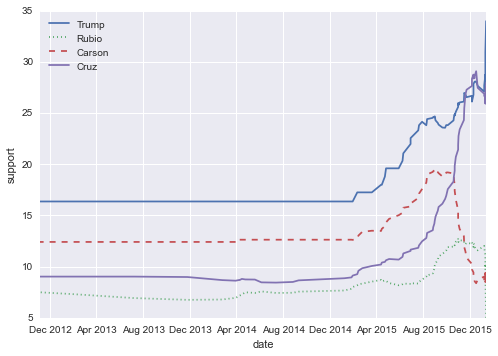

In [141]:
makePlot(['Trump','Rubio','Carson','Cruz'],50,df_iowa)

## Detroit data ##

Data from page 68, "Where were you brought up as a child?"

- Row = "rioter/non-rioter"
- Col = "South/North"

In [1]:
import numpy as np

In [2]:
x = np.array([[19,51],[218,149]])

### Chi-Squared Test ###

In [66]:
chi2 = lambda x : (x.sum() * (x[0,0] * x[1,1] - x[1,0] * x[0,1])**2) /\
float(x[0,].sum() * x[1,].sum() * x[:,0].sum() * x[:,1].sum())

In [67]:
print chi2(x)

24.6452750114


In [39]:
from scipy.stats import chi2_contingency,chisquare

In [265]:
chi2_computed,pval,dof,expected = chi2_contingency(x,correction=False)

In [266]:
print chi2_computed, pval, dof, expected

24.6452750114 6.89135087726e-07 1 [[  37.96338673   32.03661327]
 [ 199.03661327  167.96338673]]


Let's make it a closer case.
Suppose we had only $20\%$ as much data.

In [168]:
x_samp = np.random.multinomial(x.sum()/5,
                               (x / float(x.sum())).reshape(4)).reshape(2,2)

In [222]:
print x
print x_samp

[[ 19  51]
 [218 149]]
[[ 4 15]
 [39 29]]


In [267]:
chi2_computed,pval,dof,expected = chi2_contingency(x_samp,correction=False)
print chi2_computed, pval

7.82854932615 0.00514273582535


#### P-values as probabilities #### 
The $p$-value computed from the chi-squared test is a probability: specifically, it's the probability of the chi-squared statistic being at least this large in a sample of this size, under the null hypothesis.

This means that if we simulate from the null hypothesis enough times, we can reconstruct the same value.

Let's do try it.

The null hypothesis is that the two contingencies -- participating in the unrest, and being from the south -- are unrelated. Each person's chance of each contingency is an independent draw from the *marginal probability* associated with each contingency. Let's compute those marginals.

In [268]:
p_southern_marginal = x_samp.sum(axis=0) / float(x_samp.sum())
p_riot_marginal = x_samp.sum(axis=1)/float(x_samp.sum())
print p_southern_marginal
print p_riot_marginal

[ 0.49425287  0.50574713]
[ 0.2183908  0.7816092]


In the null hypothesis, the two contingencies are independent, as in $P(x,y) = P(x) \times P(y)$.

Mathematically, we can represent the joint probability as an outer product of the two probability distributions

In [269]:
print p_southern_marginal[0] * p_riot_marginal[0], p_southern_marginal[1] * p_riot_marginal[0]
print p_southern_marginal[0] * p_riot_marginal[1], p_southern_marginal[1] * p_riot_marginal[1]

p_contingent_null = np.outer(p_riot_marginal,p_southern_marginal)
print p_contingent_null

0.107940282732 0.110450521866
0.386312590831 0.395296604571
[[ 0.10794028  0.11045052]
 [ 0.38631259  0.3952966 ]]


To simulate counts from the null distribution, we use the *multinomial* probability, which is a distribution over counts of discrete events.

In [272]:
print expected
print p_contingent_null * x_samp.sum()

[[  9.3908046   9.6091954]
 [ 33.6091954  34.3908046]]
[[  9.3908046   9.6091954]
 [ 33.6091954  34.3908046]]


In [270]:
# the first parameter is the total number of counts
# the second parameter is the null distribution reshaped into a vector
rand_x_vec = np.random.multinomial(x_samp.sum(),p_contingent_null.reshape(4))
# we then reshape the vector back into a matrix
rand_x = rand_x_vec.reshape(2,2)
print rand_x

[[ 8 16]
 [33 30]]


Now we want to know how often does the simulated chi-squared value exceed the observed chi-squared value from our data. This is what is meant by the $p$-value.

In [312]:
N_samp = 50000
sim_chi_sq = np.zeros(N_samp)
for i in xrange(N_samp):
    rand_x = np.random.multinomial(x_samp.sum(),p_contingent_null.reshape(4)).reshape(2,2)
    sim_chi_sq[i] = chi2(rand_x)

In [313]:
p_empirical = (sim_chi_sq > chi2_computed).mean()
print p_empirical, pval

0.00514 0.00514273582535


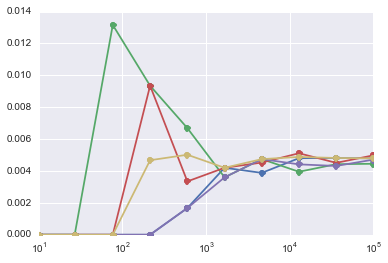

In [321]:
N_samp = 100000
ref_N = np.logspace(1,np.log10(N_samp),10).astype(int)
for _ in xrange(5):
    sim_chi_sq = np.zeros(N_samp)
    ref_vals = []
    for i in xrange(N_samp):
        rand_x = np.random.multinomial(x_samp.sum(),p_contingent_null.reshape(4)).reshape(2,2)
        sim_chi_sq[i] = chi2(rand_x)
        if (i+1) in ref_N:
            ref_vals.append((sim_chi_sq[:i] > chi2_computed).mean())
    plt.semilogx(ref_N,ref_vals,'o-')

# Chapter 5: Presidential approval data #

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data-and-demos/pj-president-approval.csv')

In [3]:
df

,Name,Rating,Party,Inaugural
0,Truman,45.28,1,1944
1,Ike,65.03,2,1953
2,JFK,70.10,1,1961
3,LBJ,55.10,1,1963
4,Nixon,49.02,2,1969
5,Ford,47.19,2,1973
6,Carter,45.48,1,1977
7,Reagan,52.79,2,1981
8,Bush,60.86,2,1989
9,Clinton,55.10,1,1993


## Basic data description ##

In [18]:
df.Rating.describe(percentiles=[])

count    10.000000
mean     54.595000
std       8.485803
min      45.280000
50%      53.945000
max      70.100000
Name: Rating, dtype: float64

## Stem-and-leaf ##

No native support for "stem-and-leaf", but I found a code [here](http://pirsquared.org/blog/stem-tweet.html).

In [5]:
from __future__ import print_function
import numpy as np
def stem(d):
    "A stem-and-leaf plot that fits in a tweet by @ivanov"
    l,t=np.sort(d),10
    O=range(l[0]-l[0]%t,l[-1]+11,t)
    I=np.searchsorted(l,O)
    for e,a,f in zip(I,I[1:],O): print('%3d|'%(f/t),*(l[e:a]-f),sep='')


In [6]:
stem(df.Rating.astype(int))

  4|5579
  5|255
  6|05
  7|0


## Grouping by political party ##

Page 89 shows grouping by party. The format there is a little nicer, but Pandas groupby + describe gives the same information.

In [13]:
df.groupby('Party')['Rating'].describe(percentiles=[])

Party       
1      count     5.000000
       mean     54.212000
       std      10.124649
       min      45.280000
       50%      55.100000
       max      70.100000
2      count     5.000000
       mean     54.978000
       std       7.690557
       min      47.190000
       50%      52.790000
       max      65.030000
dtype: float64

## Cross-tabulation ##

In [30]:
df['Popular'] = (df['Rating'] > 53.5)

In [31]:
pd.crosstab(df['Party'],df['Popular'])

Popular,False,True
Party,,
1,2,3
2,3,2


## Sorting and z-scores ##

SPSS ```summarize``` apparently sorts and provides z-scores in a single command.

I don't think there's a single Pandas command to do this, but it's not difficult make it happen.

In [39]:
df['Zscore'] = (df['Rating'] - df['Rating'].mean())/df['Rating'].std()

In [40]:
df.sort('Rating',ascending=False)

,Name,Rating,Party,Inaugural,popular,Popular,Zscore
2,JFK,70.10,1,1961,True,True,1.827169
1,Ike,65.03,2,1953,True,True,1.229701
8,Bush,60.86,2,1989,True,True,0.738292
3,LBJ,55.10,1,1963,True,True,0.059511
9,Clinton,55.10,1,1993,True,True,0.059511
7,Reagan,52.79,2,1981,False,False,-0.212708
4,Nixon,49.02,2,1969,False,False,-0.656980
5,Ford,47.19,2,1973,False,False,-0.872634
6,Carter,45.48,1,1977,False,False,-1.074147
0,Truman,45.28,1,1944,False,False,-1.097716


In [43]:
%pylab inline
import seaborn as sms

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [63]:
ts = pd.Series(np.array(df['Rating']),index=df['Inaugural'])

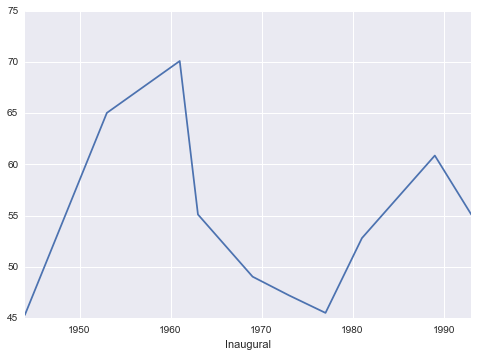

In [65]:
ax = ts.plot()

# Sampling from counties #

Meyer presents this in Chapter 6 (page 107) in terms of a multi-step sampling procedure, where you first decide how many samples to draw from each county, and then draw them uniformly at random within each county. 

A similar technique is necessary if we are sampling instances from very large files, where random access is too expensive -- we need a **streaming** algorithm.

Suppose we have a file with 100 billion lines in it, and we want to sample 100 lines, uniformly at random. How can we do it, while iterating through the file only once, and consuming only 100 elements of memory?

More generally, say we have a file with $N$ lines, and we want to get a fair sample of $k$, with a time cost of $\mathcal{O}(N)$ and a space cost of $\mathcal{O}(k)$.

## Algorithm 1 ##

- Create a buffer $b$ of size $k$.
- For each line $t$, sample a number from a uniform distribution $x \sim U([0,1])$.
- If $x < \frac{k}{N}$, then:
    - Sample an integer from a uniform distribution $i \sim U({1, 2, \ldots, k})$
    - Set $b[i] = r_t$, where $r_t$ is the record number $t$

Will this work?

In [145]:
r = np.arange(10000)
print(r)

[   0    1    2 ..., 9997 9998 9999]


In [157]:
def getSample1(r,k):
    N = float(len(r))
    buffer = [0] * k
    for r_t in r:
        if np.random.rand() < k/N:
            buffer[np.random.randint(k)] = r_t
    return buffer

In [158]:
for _ in xrange(5):
    print(getSample1(r,5))

[8086, 9822, 0, 5315, 954]
[3579, 0, 0, 5585, 0]
[0, 5711, 0, 9222, 0]
[959, 0, 3683, 0, 1895]
[4273, 0, 0, 9378, 7297]


Too many zeros! These are elements of the buffer that are not getting filled.
Since the order of elements in the buffer doesn't matter, let's make sure that we always fill an empty slot.

In [160]:
def getSample2(r,k):
    N = float(len(r))
    buffer = [0] * k
    b_ctr = 0
    for r_t in r:
        if np.random.rand() < k/N:
            buffer[b_ctr] = r_t
            b_ctr = (b_ctr + 1) % k
    return buffer

In [161]:
for _ in xrange(5):
    print(getSample2(r,5))

[7124, 9141, 9378, 6086, 6741]
[9316, 7140, 8101, 9148, 9176]
[2214, 4630, 6551, 0, 0]
[9317, 2610, 5422, 7477, 8076]
[4848, 7008, 8754, 9658, 4814]


better! still some zeros, but not as many.

But there's a more subtle problem here: we're more likely to draw later records rather than earlier ones.

Why? Because the earlier records will get overwritten, and the later ones won't. 

To see this let's look at a histogram of the records that we draw after iterating the algorithm 1000 times.

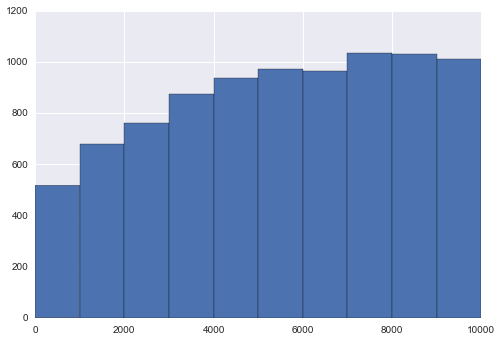

In [172]:
all_samples = []
for _ in xrange(1000):
    all_samples.extend([x for x in getSample2(np.arange(10000),10) if x > 0])
plt.hist(all_samples);

We're twice as likely to draw a record from the last 1000, than from the first 1000. This is not a fair sample.

## Vitter's Reservoir Sampler ##

In [ ]:
# todo